## Recommender Systems with Python

Being sheltered-in-place, an easy entertainment option is to watch (sometimes binge-watch) movies. But how many of us have struggled over the question - "What to watch?". Yes, I also fall in the category of browsing through my favorite media-services provider before I settle down on something to watch. 

<p>This struggle(ahem!) triggered a thought that what if I could come up with my own Recommender system using my Python and Pandas coding skills ?? 

<p>What you find described below is a basic recommendation system that suggests items that are most similar to a particular item, in this case, movie names. Please note that this is not a "true" recommendation system, it just tells you what movies/items are most similar to your pre-existing movie choice.

In [2]:
#importing the usual suspects

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
%matplotlib inline

I use the MovieLens dataset - a classic dataset available at: https://grouplens.org/datasets/movielens/ on the GroupLens website. For this project I will use the data set with 1 million movie listings with user ratings on a scale from 1-5. The columns are comma-separated and I will use pandas **read_csv** command to read in the data files. I have downloaded the files locally on my computer. <p>Please note that you can also curl the zipped folder from the website as well.

In [3]:
df_movies = pd.read_csv('movies.dat',sep='::',header=None,engine='python')
df_movies.columns = ['MovieID','Title','Genres']
df_ratings = pd.read_csv('ratings.dat',sep='::',header=None,engine='python')
df_ratings.columns = ['UserID','MovieID','Rating','Timestamp']
df = pd.merge(df_movies,df_ratings,on='MovieID')
#df.columns = ['UserID','MovieID','Rating','Timestamp']

In [4]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Let's see the total and unique number of users and movies in the dataframe. As, expected there are repetitions for the movie names. 

In [5]:
n_users = df_ratings['UserID'].max()
n_items = df_ratings['MovieID'].max()
n_users_unique = len(df_ratings.UserID.unique())
n_items_unique = len(df_ratings.MovieID.unique())
print('Total number of users in the dataset:  '+str(n_users))
print('Total number of movies in the dataset: '+str(n_items))
print('Unique number of users in the dataset:  '+str(n_users_unique))
print('Unique number of movies in the dataset: '+str(n_items_unique))

Total number of users in the dataset:  6040
Total number of movies in the dataset: 3952
Unique number of users in the dataset:  6040
Unique number of movies in the dataset: 3706


Now let's create a matrix that has the user ids as the rows and the movie titles as columns. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [6]:
moviemat = df.pivot_table(index='UserID',columns='Title',values='Rating')
moviemat.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We create a new dataframe called **collection_ratings** that groups the movie names together and lists their average rating and the count of total ratings each movie recieved. 

In [7]:
collection_ratings = pd.DataFrame(df.groupby('Title')['Rating'].mean())
collection_ratings['Number of Ratings'] = pd.DataFrame(df.groupby('Title')['Rating'].count())
collection_ratings.head()

,Rating,Number of Ratings
Title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


### Some Visualizations

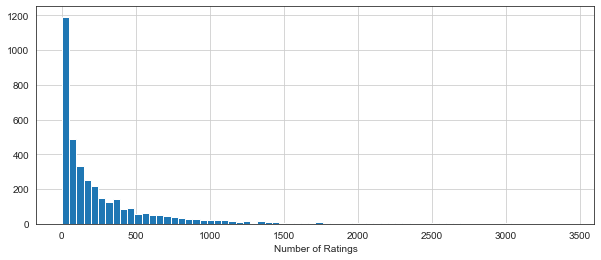

In [15]:
plt.figure(figsize=(10,4))
plt.xlabel("Number of Ratings")
collection_ratings['Number of Ratings'].hist(bins=70)

As expected, there **are** lot more 0 ratings than other ratings.

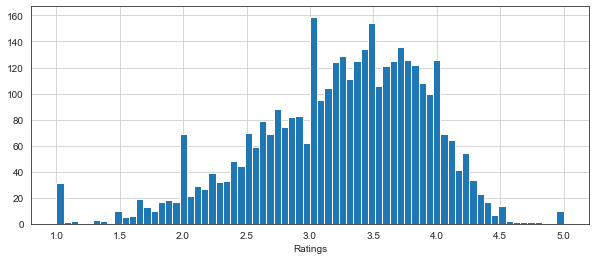

In [16]:
plt.figure(figsize=(10,4))
plt.xlabel("Ratings")
collection_ratings['Rating'].hist(bins=70)

The average rating in this dataset is centered around 3.5.

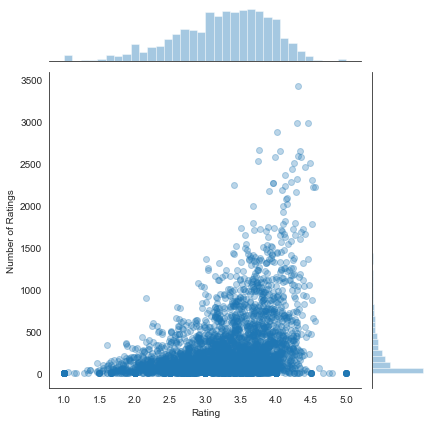

In [19]:
sns.jointplot(x='Rating',y='Number of Ratings',data=collection_ratings,alpha=0.3)

So, there is an increased tendency amongst users to mark a movie with a higher rating than a lower one. 

Let's see what are the top 10 most rated movies: 

In [7]:
collection_ratings.sort_values('Number of Ratings',ascending=False).head(10)

,Rating,Number of Ratings
Title,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672
Saving Private Ryan (1998),4.337354,2653
Terminator 2: Judgment Day (1991),4.058513,2649
"Matrix, The (1999)",4.315830,2590
Back to the Future (1985),3.990321,2583


Now let's try to recommend similar movies. <p>Say for example - **Jurassic Park (1993)** and **Star Wars: Episode IV - A New Hope(1977)**

In [8]:
jurrasic_user_rating = moviemat['Jurassic Park (1993)']
starwars_user_rating = moviemat['Star Wars: Episode IV - A New Hope (1977)']

In [9]:
similar_to_jurassic = moviemat.corrwith(jurrasic_user_rating)

#changing series to a Data Frame
corr_jurassic = pd.DataFrame(similar_to_jurassic,columns=['Correlation'])
#Dropping NA values
corr_jurassic.dropna(inplace=True)
#Adding the number of ratings that each suggesting movie received
corr_jurassic = corr_jurassic.join(collection_ratings['Number of Ratings'])
#Only suggesting those movies that have more than 100 reviews

corr_jurassic[corr_jurassic['Number of Ratings']>100].sort_values('Correlation',ascending=False).head(6)[1:]

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,Number of Ratings
Title,,
"Lost World: Jurassic Park, The (1997)",0.522265,1255
"Dark Half, The (1993)",0.491516,102
"Fighting Seabees, The (1944)",0.460547,101
"Believers, The (1987)",0.445108,102
"Program, The (1993)",0.443207,152


Hmmm.. seems to work ! The top recommendation is Lost World, which is a sequel to Jurassic Park.

In [10]:
similar_to_starwars = moviemat.corrwith(starwars_user_rating)

# changing series to a Data Frame
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
#Drpping NA values
corr_starwars.dropna(inplace=True)
#Adding the number of ratings that each suggesting movie received
corr_starwars = corr_starwars.join(collection_ratings['Number of Ratings'])
#Only suggesting those movies that have more than 100 reviews

corr_starwars[corr_starwars['Number of Ratings']>100].sort_values('Correlation',ascending=False).head(6)[1:]

,Correlation,Number of Ratings
Title,,
Star Wars: Episode V - The Empire Strikes Back (1980),0.661552,2990
Star Wars: Episode VI - Return of the Jedi (1983),0.574808,2883
Raiders of the Lost Ark (1981),0.421425,2514
Dracula (1958),0.398710,102
Girlfight (2000),0.365521,127


This works too! The top suggestions for Star Wars movies are sequels to this one. Life sorted - ehh ?? 

The success of this simple recommender system led me to wonder about how *real* recommendation works. Read on to see two of the most common Machine Learning Algorithms that are used for recommendations !

## Memory-Based Collaborative Filtering 

Memory-Based Collaborative Filtering approaches can be divided into two main sections: user-item filtering and item-item filtering.
<p>Item-Item Collaborative Filtering: “Users who liked this item also liked …”
<p>User-Item Collaborative Filtering: “Users who are similar to you also liked …”
<p>In both cases, I will create a user-item matrix which built from the entire dataset.After that similarity is calculated from the user-item matrix, in the form of a similarity matrix.


The original ratings dataframe has 3 necessary columns - Movie ID, User ID and Ratings. For now, this is enough. Linking the movie names to their IDs will be added later.

In [11]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


To see how many of each rating (from 1-5) exists:

In [12]:
df_ratings_count = pd.DataFrame(df_ratings.groupby('Rating').size(), columns=['count'])
df_ratings_count

,count
Rating,
1,56174
2,107557
3,261197
4,348971
5,226310


However, as seen above in the first example, there are a lot of movies that are not rated, or have *0* as rating. 

In [13]:
total_count = n_users_unique * n_items_unique
rating_zero_count = total_count - df_ratings.shape[0]

df_ratings_count = df_ratings_count.append(
    pd.DataFrame({'count': rating_zero_count}, index=[0.0]),
    verify_integrity=True,
).sort_index()
df_ratings_count

,count
0.0,21384031
1.0,56174
2.0,107557
3.0,261197
4.0,348971
5.0,226310


It's now time to build the *user-item matrix* for all ratings using numpy and adjusting *Python's zero offset*. In addition, I also exclude *unpopular* movies (with rating = 0) and inactive users (ones that have not rated a single movie). All adjustments are made on the *df_ratings* dataframe that had User IDs, Movie IDs and their ratings. Thus the new dataframe on with all calculations will be made is called *df_ratings_trimmed*

In [14]:
# get rating frequency
#number of ratings each movie got.
df_movies_cnt = pd.DataFrame(df_ratings.groupby('MovieID').size(), columns=['count'])
popularity_thres = 50
popular_movies = list(set(df_movies_cnt.query('count >= @popularity_thres').index))
df_ratings_drop_movies = df_ratings[df_ratings.MovieID.isin(popular_movies)]
print('Shape of original ratings data: ', df_ratings.shape)
print('Shape of ratings data after dropping unpopular movies: ', df_ratings_drop_movies.shape)
# get number of ratings given by every user
df_users_cnt = pd.DataFrame(df_ratings_drop_movies.groupby('UserID').size(), columns=['count'])
ratings_thres = 50
active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))
df_ratings_drop_users = df_ratings_drop_movies[df_ratings_drop_movies.UserID.isin(active_users)]
#print('shape of original ratings data: ', df_ratings.shape)
print('Shape of ratings data after dropping both unpopular movies and inactive users: ', df_ratings_drop_users.shape)

Shape of original ratings data:  (1000209, 4)
Shape of ratings data after dropping unpopular movies:  (977839, 4)
Shape of ratings data after dropping both unpopular movies and inactive users:  (920334, 4)


In [15]:
df_ratings_trimmed = df_ratings_drop_users

Now it's time to create another table with all ratings, but this time with movie IDs and User IDs. I call it *movie_uer_matrix*

In [16]:
# pivot and create movie-user matrix
movie_user_matrix = df_ratings_trimmed.pivot(index='MovieID', columns='UserID', values='Rating').fillna(0)
#map movie titles to images
movie_to_idx = {
    movie: i for i, movie in 
    enumerate(list(df_movies.set_index('MovieID').loc[movie_user_matrix.index].Title))
}
movie_user_matrix.head()

UserID,1,2,3,5,6,8,9,10,11,13,...,6026,6030,6031,6032,6033,6035,6036,6037,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,4.0,4.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


The movie_user_matrix is now transformed to a numpy array (which is a more flexible data structure) called *ratings*. The array is first initialized with 0s and later replaced by non-zero values only at indices where a non-zero rating is found in the *df_ratings_trimmed* dataframe. 

In [17]:
ratings = np.zeros((n_users, n_items))
for row in df_ratings_trimmed.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3] #In python index starts at 0
ratings

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

In [18]:
def train_test_split(ratings):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0], size=int(len(ratings[user, :].nonzero()[0]) > 0), replace=False)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]
    assert(np.all((train * test) == 0)) 
    return train, test

In [19]:
train, test = train_test_split(ratings)

Using the pairwise_distances function from sklearn to calculate the similarity matrix using the pearson correlation.. <p>Note, the output will range from 0 to 1 since the ratings are all positive.

#### Item-Item Collaborative Filtering: 

In [20]:
from sklearn.metrics import pairwise_distances
item_correlation = 1 - pairwise_distances(train.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0.

Now that the similarity matrix is created, let's look at some recommendations for movies of our choice. All that is needed is the movie ID and using the movies dataframe, movie names are suggested. 

In [21]:
def top_k_movies(correlation, movie_idx, k=6):
    return [df_movies[df_movies['MovieID']==x]['Title'].tolist()[0] for x in np.argsort(correlation[movie_idx,:])[:-k-1:-1][1:]]

In [23]:
#Defining any movie id
idx = 2000
print("For movie: ", df_movies[df_movies['MovieID']==idx]['Title'].tolist()[0],"\n")
print("Predictions:\n"),
print("\n".join(top_k_movies(item_correlation,idx)))

For movie:  Lethal Weapon (1987) 

Predictions:

Exorcist III, The (1990)
Lethal Weapon 2 (1989)
Outsiders, The (1983)
Sound of Music, The (1965)
Tough and Deadly (1995)


In [24]:
idx = 480
print("For movie: ", df_movies[df_movies['MovieID']==idx]['Title'].tolist()[0],"\n")
print("Predictions:\n"),
print("\n".join(top_k_movies(item_correlation,idx)))

For movie:  Jurassic Park (1993) 

Predictions:

Cutthroat Island (1995)
Candyman (1992)
Prizzi's Honor (1985)
Nina Takes a Lover (1994)
Kalifornia (1993)


Hmmm ! Not so bad, considering that both Jurassic Park and Cutthroat island have the same theme of people being *marooned* on an island.

#### User-Item Collaborative Filtering: 

In [26]:
user_correlation = 1 - pairwise_distances(train, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0.

In [27]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [29]:
def top_k_movies_user(correlation, user_idx, k=10):
    return [df_ratings[df_ratings['UserID']==x]['MovieID'].tolist()[0] for x in np.argsort(correlation[user_idx,:])[:-k-1:-1][1:]]

In [40]:
#Defining any user id
idx = 1000
print("For user with ID:",idx)
print("Number of movies seen and rated: ", len(df_ratings[df_ratings['UserID']==idx]['MovieID'].tolist()))
seen_movies_id = df_ratings[df_ratings['UserID']==idx]['MovieID'].tolist()
seen_movies_top_ten = seen_movies_id[:10]
print("\n")
print("Top 10 movies seen by this user are: \n")
for movie_id in seen_movies_top_ten:
    print(df_movies[df_movies['MovieID']== movie_id]['Title'].tolist()[0])
print("\n")
print("Users who are similar to thsi user also liked..\n")
seen = []
movie_id_list = top_k_movies_user(user_correlation,idx)
for x in movie_id_list:
    if x not in seen:
        print(df_movies[df_movies['MovieID']== x]['Title'].tolist()[0])
        seen.append(x)

For user with ID: 1000
Number of movies seen and rated:  84


Top 10 movies seen by this user are: 

Who Framed Roger Rabbit? (1988)
Licence to Kill (1989)
X-Men (2000)
Aladdin (1992)
Terminator 2: Judgment Day (1991)
Toy Story (1995)
Batman (1989)
Snow White and the Seven Dwarfs (1937)
Beauty and the Beast (1991)
Pinocchio (1940)


Users who are similar to thsi user also liked..

Silence of the Lambs, The (1991)
Who Framed Roger Rabbit? (1988)
Honey, I Blew Up the Kid (1992)
X-Men (2000)
Being John Malkovich (1999)
Terminator 2: Judgment Day (1991)


In [41]:
#Defining any user id
idx = 300
print("For user with ID:",idx)
print("Number of movies seen and rated: ", len(df_ratings[df_ratings['UserID']==idx]['MovieID'].tolist()))
seen_movies_id = df_ratings[df_ratings['UserID']==idx]['MovieID'].tolist()
seen_movies_top_ten = seen_movies_id[:10]
print("\n")
print("Top 10 movies seen by this user are: \n")
for movie_id in seen_movies_top_ten:
    print(df_movies[df_movies['MovieID']== movie_id]['Title'].tolist()[0])
print("\n")
print("Users who are similar to thsi user also liked..\n")
seen = []
movie_id_list = top_k_movies_user(user_correlation,idx)
for x in movie_id_list:
    if x not in seen:
        print(df_movies[df_movies['MovieID']== x]['Title'].tolist()[0])
        seen.append(x)

For user with ID: 300
Number of movies seen and rated:  249


Top 10 movies seen by this user are: 

Mission: Impossible (1996)
Bridge on the River Kwai, The (1957)
Hear My Song (1991)
Naked Gun: From the Files of Police Squad!, The (1988)
Treasure of the Sierra Madre, The (1948)
Better Off Dead... (1985)
Stand by Me (1986)
Terminator 2: Judgment Day (1991)
Toy Story (1995)
Adventures in Babysitting (1987)


Users who are similar to thsi user also liked..

Being John Malkovich (1999)
Parent Trap, The (1998)
Who Framed Roger Rabbit? (1988)
X-Men (2000)
For Your Eyes Only (1981)
Multiplicity (1996)


## Model-based Collaborative Filtering

The next popular recommender system uses a Model-based Collaborative Filtering. It is still an item based recommender system and uses K-Nearest Neighbors (KNN) to implement that **only** relies on item feature similarity. KNN calculates the *distance* between the target movie (user provided) and every other movie in its database, then it ranks its distances and returns the top K nearest neighbor movies as the most similar movie recommendations.

The *ratings* numpy array has a sparsity of:

In [30]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity:',round(sparsity),'%')

Sparsity: 4 %


This indicates that the ratings array mostly consists of 0 values. 

However, in the dataframe (df_ratings) there exists rows and columns with ratings = NaN. This is taken care of by using the built in module of scipy called *csr_matrix*, that creates a spare matrix and fills the NaN values with 0s.
So now there is a *sparse* user-item interaction matrix called *df_movie_features*.

In [47]:
from scipy.sparse import csr_matrix
# pivot ratings into movie features
df_movie_features = df_ratings.pivot(
    index='MovieID',
    columns='UserID',
    values='Rating'
).fillna(0)

In [48]:
mat_movie_features = csr_matrix(df_movie_features.values)

In [49]:
df_movie_features.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,...,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Finally, the data frame is now ready to make some predictions for movies !

In [50]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [51]:
#Creating a movie-user matrix
movie_user_mat = df_ratings_drop_users.pivot(index='MovieID', columns='UserID', values='Rating').fillna(0)
#map movie titles to index
movie_to_idx = {
    movie: i for i, movie in 
    enumerate(list(df_movies.set_index('MovieID').loc[movie_user_mat.index].Title))
}
#transform matrix to scipy sparse matrix
movie_user_mat_sparse = csr_matrix(movie_user_mat.values)

In [52]:
# define model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
# fit
model_knn.fit(movie_user_mat_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

A problem we had so far was that we needed to provide the exact name of the movie to our recommender system, for suggestions. For example, just typing *Toy Story* will not yield any result but one has to type *Toy Story (1995)*. I take care of this issue using the python library **fuzzywuzzy** used for string matching.

In [53]:
from fuzzywuzzy import fuzz

def fuzzy_matching(mapper, fav_movie, verbose=True):
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database:{0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

Now to define a function for the recommendation system:

In [54]:
def make_recommendation(model_knn, data, mapper, movie, n_recommendations):
    # fit
    model_knn.fit(data)
    # get input movie index
    print('For Movie:', movie)
    idx = fuzzy_matching(mapper, movie, verbose=True)
    
    print('Recommendations loading...\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    
    raw_recommends = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(movie))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], round(dist,2)))

Let's try to find some recommendations for a movie of our choice. 

In [55]:
my_movie = 'Toy Story'

make_recommendation(
    model_knn=model_knn,
    data=movie_user_mat_sparse,
    movie=my_movie,
    mapper=movie_to_idx,
    n_recommendations=10)

For Movie: Toy Story
Found possible matches in our database:['Toy Story (1995)', 'Toy Story 2 (1999)']

Recommendations loading...

Recommendations for Toy Story:
1: Matrix, The (1999), with distance of 0.41
2: Forrest Gump (1994), with distance of 0.41
3: Star Wars: Episode IV - A New Hope (1977), with distance of 0.41
4: Star Wars: Episode V - The Empire Strikes Back (1980), with distance of 0.4
5: Men in Black (1997), with distance of 0.4
6: Back to the Future (1985), with distance of 0.39
7: Bug's Life, A (1998), with distance of 0.38
8: Aladdin (1992), with distance of 0.37
9: Groundhog Day (1993), with distance of 0.37
10: Toy Story 2 (1999), with distance of 0.34


These recommendations are definitely better than the ones suggested by the memory-based collaborative system recommender. Since we use KNN, the distance between the target movie and every other movie in its database is also printed.

In [56]:
my_movie = 'Jurassic Park'
make_recommendation(
    model_knn=model_knn,
    data=movie_user_mat_sparse,
    movie=my_movie,
    mapper=movie_to_idx,
    n_recommendations=10)

For Movie: Jurassic Park
Found possible matches in our database:['Jurassic Park (1993)']

Recommendations loading...

Recommendations for Jurassic Park:
1: Braveheart (1995), with distance of 0.33
2: Star Wars: Episode I - The Phantom Menace (1999), with distance of 0.32
3: Star Wars: Episode VI - Return of the Jedi (1983), with distance of 0.31
4: Independence Day (ID4) (1996), with distance of 0.31
5: Star Wars: Episode V - The Empire Strikes Back (1980), with distance of 0.31
6: Star Wars: Episode IV - A New Hope (1977), with distance of 0.31
7: Total Recall (1990), with distance of 0.29
8: Matrix, The (1999), with distance of 0.27
9: Terminator 2: Judgment Day (1991), with distance of 0.25
10: Men in Black (1997), with distance of 0.24


Great !! Now let's try more sophistication using a user-based recommendation system. **Model-Based Collaborative filtering** often relies on matrix factorization (MF), which is an unsupervised learning method. <p> A well-known matrix factorization method is **Singular value decomposition (SVD)** which I implement next:

Starting from the df_movie_features DataFrame which contains all ratings for all movie IDs and from all user IDs.

In [57]:
df_movie_features.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,...,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
R = df_movie_features.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [59]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)

Skipping a lot of math, in the sparse user-item interaction matrix (df_movie_features), the predicted rating an user will give an item needs to be computed. This is what is done in the following section and it results in a *preds_df*.

In [60]:
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [61]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_movie_features.columns)
preds_df.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
0,4.191218,0.843570,1.869289,0.285030,1.463837,2.103594,0.059696,0.821407,3.626086,4.563367,...,1.016985,1.651254,-0.329481,0.144520,2.396264,2.157095,2.011424,0.529692,1.608640,1.895423
1,0.182017,0.098709,0.476705,-0.029099,-0.011170,0.168970,0.081849,0.126718,0.122656,2.956407,...,-0.047228,0.288067,0.162943,-0.085835,0.565289,0.370527,0.187999,-0.166623,-0.083723,-0.165945
2,-0.207549,0.361815,0.085786,0.012291,-0.048748,0.229944,0.093162,0.699660,0.041179,1.244553,...,-0.091221,-0.339039,0.080246,-0.020512,0.945690,0.444832,-0.069340,0.103740,-0.145742,-0.149262
3,-0.035829,0.023612,-0.036092,0.070299,0.247499,0.073590,0.045729,0.349674,-0.036587,0.364232,...,0.081029,-0.043738,0.052129,0.007029,0.345570,0.420362,-0.199117,0.009630,-0.062795,0.094344
4,0.035604,-0.008163,-0.014967,0.058086,-0.054597,0.179023,-0.093560,-0.099099,-0.093131,1.133367,...,0.023187,-0.062516,0.056193,-0.055942,0.599832,-0.051986,0.286749,-0.084247,-0.099841,-0.034947


Now for the final recommendation function:

In [62]:
def recommend_movies(preds_df, UserID, df_movies, original_ratings_df, num_recommendations=5):
    
# Get and sort the user's predictions
    
    user_row_number = UserID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False) # UserID starts at 1
    #print(sorted_user_predictions)
# Get the user's data and merge in the movie information.
    
    user_data = original_ratings_df[original_ratings_df.UserID == (UserID)]
    user_full = (user_data.merge(df_movies, how = 'left', left_on = 'MovieID', right_on = 'MovieID').
                     sort_values(['Rating'], ascending=False)
                 )
    #print(user_full)
    print('User {0} has already seen & rated {1} movies.'.format(UserID, user_full.shape[0]))
    print('Recommending {0} highest rated movies that are not yet rated by user {1}.'.format(num_recommendations,UserID))

    filtered_df_movies = df_movies[~df_movies['MovieID'].isin(user_full['MovieID'])]
    sorted_user_pred_df = pd.DataFrame(sorted_user_predictions).reset_index()
    
    merged_df = filtered_df_movies.merge(sorted_user_pred_df,how = 'left', left_on = 'MovieID',right_on = 'UserID')
    merged_df_rename = merged_df.rename(columns = {user_row_number: 'Predictions'})
    recommendations = merged_df_rename.sort_values('Predictions', ascending = False).iloc[:num_recommendations, :-1]
                      

    return user_full, recommendations

Predicting movie choices for User ID = 1000..

In [63]:
already_rated,predictions = recommend_movies(preds_df, 1000, df_movies, df_ratings, 10)

User 1000 has already seen & rated 84 movies.
Recommending 10 highest rated movies that are not yet rated by user 1000.


The already_rated data frame has movies that User ID = 330 has already seen and rated. 

In [64]:
already_rated[['Title','Rating','Genres']].reset_index(drop=True).head()

,Title,Rating,Genres
0,"Night to Remember, A (1958)",5,Action|Drama
1,"Verdict, The (1982)",5,Drama
2,Thelma & Louise (1991),5,Action|Drama
3,Star Wars: Episode IV - A New Hope (1977),5,Action|Adventure|Fantasy|Sci-Fi
4,Winnie the Pooh and the Blustery Day (1968),5,Animation|Children's


So based on that , the predictions for the next 10 movie recommendations are:

In [65]:
predictions[['Title','Genres']].reset_index(drop=True)

,Title,Genres
0,"Big Combo, The (1955)",Film-Noir
1,1-900 (1994),Romance
2,Air America (1990),Action|Comedy
3,Homeward Bound: The Incredible Journey (1993),Adventure|Children's
4,Hamlet (1948),Drama
5,"Shooter, The (1995)",Action
6,Dirty Dancing (1987),Musical|Romance
7,Marnie (1964),Thriller
8,East Palace West Palace (Dong gong xi gong) (1...,Drama
9,Out of Sight (1998),Action|Crime|Romance


#### That's all for now. Next up: Book Recommendations ! 